<a href="https://colab.research.google.com/github/1911521014SitiNina/Kel-4-APM/blob/main/Multiple_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Membaca dataset yang di inputkan
dataset = pd.read_csv("kc_house_data.csv")

In [ ]:
#Menampilkan dataset baris awal
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Menetapkan nilai X dan Y
x = dataset[['bedrooms','bathrooms', 'floors', 'condition', 'grade']]
y = dataset['price']

In [ ]:
#Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
#instal linear Regresi
!pip install LinearRegression

In [ ]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -1251415.054108121
Coefficients:


[('bedrooms', 4732.139326527783),
 ('bathrooms', 81733.94586596027),
 ('floors', -47984.56295542722),
 ('condition', 73173.45176029316),
 ('grade', 186150.03594687697)]

In [ ]:
#Prediksi data test
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("prediksi data test: {}".format(y_pred_mlr))

prediksi data test: [ 393717.70953453  466891.16129482  766017.78142828 ...  984451.03319062
  632607.71077521 1247602.87567693]


In [ ]:
#Perbandingan nilai asli dan prediksi
mlr_diff = pd.DataFrame({'Nilai Asli': y_test, 'Hasil Prediksi': y_pred_mlr})
mlr_diff.head()

,Nilai Asli,Hasil Prediksi
19836,285000.0,393717.709535
10442,239950.0,466891.161295
20548,460000.0,766017.781428
11014,397500.0,295109.072213
4138,545000.0,618349.267718


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 48.05
Mean Absolute Error: 171259.13968291663
Mean Square Error: 71412396061.63747
Root Mean Square Error: 267230.97885843524


Text(0.5, 1.0, 'Nilai Asli vs Prediksi')

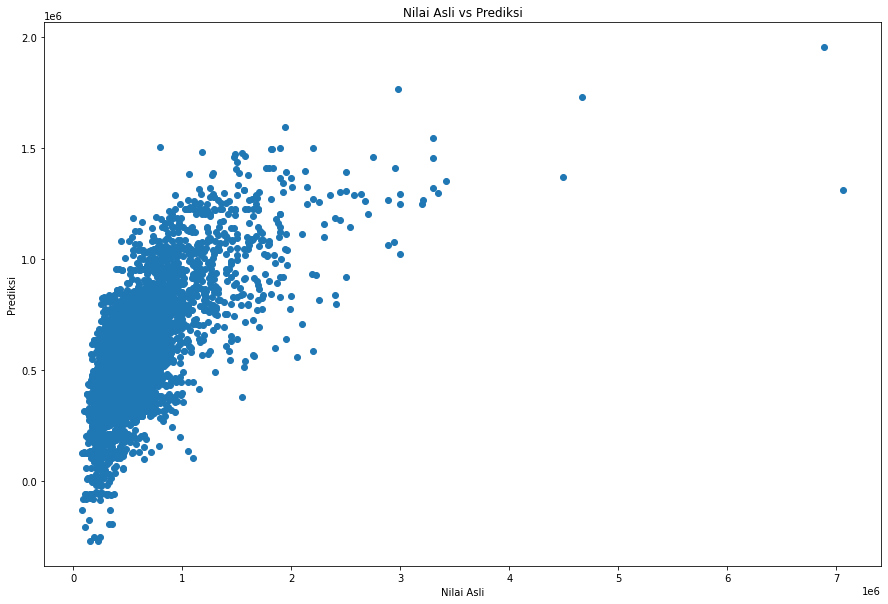

In [ ]:
#Grafil
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Nilai Asli')
plt.ylabel('Prediksi')
plt.title('Nilai Asli vs Prediksi')